In [1]:
import json
import string
import pickle
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, Embedding, LSTM, Flatten, Dense, LayerNormalization, Dropout

In [3]:
with open('/content/Mental Health Conversational.json', 'r') as content:
  chatbot = json.load(content)
data = pd.DataFrame(chatbot['intents'])

In [18]:
# tags = []
# patterns = []
# responses = {}
# words = []
# classes = []
# documents = []
# ignore_words = ['', '?', '!']

# for intent in chatbot['intents']:
#   responses[intent['tag']] = intent['responses']
#   for lines in intent['patterns']:
#     patterns.append(lines)
#     tags.append(intent['tag'])
#     for pattern in intent['patterns']:
#       w = nltk.word_tokenize(pattern)
#       words.extend(w)
#       documents.append((w, intent['tag']))

#       if intent['tag'] not in classes:
#         classes.append(intent['tag'])

# chatbot = pd.DataFrame({"patterns":patterns, "tags":tags})

dictionary = {"tag":[], "patterns":[], "responses":[]}
for i in range (len(data)):
  pattern = data[data.index==i]['patterns'].values[0]
  response = data[data.index==i]['responses'].values[0]
  tag = data[data.index==i]['tag'].values[0]
  for j in range (len(pattern)):
    dictionary['tag'].append(tag)
    dictionary['patterns'].append(pattern[j])
    dictionary['responses'].append(response)
data = pd.DataFrame.from_dict(dictionary)
data

TypeError: ignored

In [5]:
data['tag'].unique()

array(['greeting', 'morning', 'afternoon', 'evening', 'night', 'goodbye',
       'thanks', 'about', 'skill', 'creation', 'help', 'sad', 'stressed',
       'worthless', 'depressed', 'happy', 'casual', 'anxious',
       'not-talking', 'sleep', 'scared', 'death', 'understand', 'done',
       'suicide', 'hate-you', 'hate-me', 'default', 'jokes', 'repeat',
       'wrong', 'stupid', 'location', 'something-else', 'ask', 'problem',
       'no-approach', 'learn-more', 'user-agree', 'meditation',
       'user_meditation', 'hugu_useful', 'user-advice',
       'learn_mental_health', 'mental_health_fact', 'fact_1', 'fact_2',
       'fact_3', 'fact_4', 'fact_5', 'fact_6', 'fact_7', 'fact_8',
       'fact_9', 'fact_10', 'fact_11', 'fact_12', 'fact_13', 'fact_14',
       'fact_15', 'fact_16', 'fact_17', 'fact_18', 'fact_19', 'fact_20',
       'fact_21', 'fact_22', 'fact_23', 'fact_24', 'fact_25', 'fact_26',
       'fact_27', 'fact_28', 'fact_29', 'fact_30', 'fact_31', 'fact_32',
       'panic_disorder

In [6]:
tokenizer = Tokenizer(lower=True, split=' ')
tokenizer.fit_on_texts(data['patterns'])
tokenizer.get_config()

vocab = len(tokenizer.word_index)
print("Unique word : ",vocab)

pattern_train = tokenizer.texts_to_sequences(data['patterns'])
x_train = pad_sequences(pattern_train, padding="post")
print("Input shape : ", x_train.shape)

print()
label_encode = LabelEncoder()
y_train = label_encode.fit_transform(data['tag'])
print("Label shape : ", y_train.shape)
print("Output length : ", len(np.unique(y_train)))



Unique word :  314
Input shape :  (253, 18)

Label shape :  (253,)
Output length :  88


In [7]:
# input_shape = x_train.shape[1]
# output_len = len(np.unique(y_train))
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(x_train.shape[1])),
    tf.keras.layers.Embedding(input_dim=vocab+1, output_dim = 100, mask_zero=True),
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.LayerNormalization(),
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.LayerNormalization(),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.LayerNormalization(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.LayerNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.LayerNormalization(),
    tf.keras.layers.Dense(len(np.unique(y_train)), activation='softmax')
])


model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 18, 100)           31500     
                                                                 
 lstm (LSTM)                 (None, 18, 32)            17024     
                                                                 
 layer_normalization (Layer  (None, 18, 32)            64        
 Normalization)                                                  
                                                                 
 lstm_1 (LSTM)               (None, 18, 32)            8320      
                                                                 
 layer_normalization_1 (Lay  (None, 18, 32)            64        
 erNormalization)                                                
                                                                 
 lstm_2 (LSTM)               (None, 32)                8

In [8]:
history = model.fit(x_train, y_train,
                    batch_size=10, epochs=75,
                    )

Epoch 1/75
26/26 [==============================] - 34s 224ms/step - loss: 4.7534 - accuracy: 0.0277
Epoch 2/75
26/26 [==============================] - 1s 42ms/step - loss: 4.0597 - accuracy: 0.0870
Epoch 3/75
26/26 [==============================] - 1s 30ms/step - loss: 3.5934 - accuracy: 0.1542
Epoch 4/75
26/26 [==============================] - 1s 30ms/step - loss: 3.0691 - accuracy: 0.2925
Epoch 5/75
26/26 [==============================] - 1s 18ms/step - loss: 2.6517 - accuracy: 0.4111
Epoch 6/75
26/26 [==============================] - 1s 41ms/step - loss: 2.2499 - accuracy: 0.4466
Epoch 7/75
26/26 [==============================] - 2s 62ms/step - loss: 2.1030 - accuracy: 0.4625
Epoch 8/75
26/26 [==============================] - 1s 42ms/step - loss: 1.7844 - accuracy: 0.5771
Epoch 9/75
26/26 [==============================] - 1s 24ms/step - loss: 1.4646 - accuracy: 0.6957
Epoch 10/75
26/26 [==============================] - 0s 19ms/step - loss: 1.2367 - accuracy: 0.7273
Epoch 1

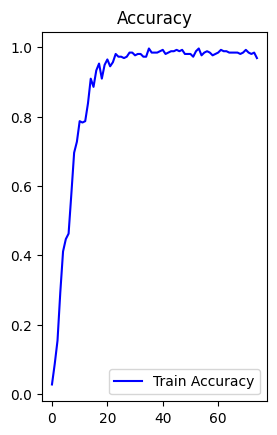

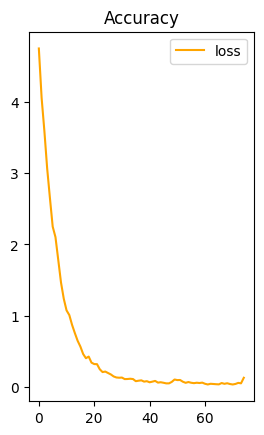

In [9]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', color ='blue')
plt.legend(loc='lower right')
plt.title('Accuracy')
plt.show()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss', color='orange')
plt.legend(loc='upper right')
plt.title('Accuracy')
plt.show()

In [22]:
import random
def chatbot_test():
  while True:
    user_input = input("User: ")
    pattern_test = tokenizer.texts_to_sequences([user_input])
    x_test = pad_sequences(pattern_test, padding="post")

    prediction = model.predict(x_test)[0]
    label = label_encode.inverse_transform([np.argmax(prediction)])[0]
    response = data[data['tag'] == label]['responses'].values[0]

    print("Chatbot: ", format(random.choice(response)))
    if data[data['tag']] == 'goodbye':
      break
chatbot_test()

User: senang
1/1 [==============================] - 0s 25ms/step
Chatbot:  Apakah terjadi sesuatu yang membuatmu merasa seperti ini?
User: oke
1/1 [==============================] - 0s 23ms/step
Chatbot:  Ceritakan lebih banyak lagi
User: aku merasa sangat cemas
1/1 [==============================] - 0s 25ms/step
Chatbot:  Jangan keras pada dirimu sendiri. Kenapa kamu merasa sangat cemas?
User: aku tidak ingin membicarakannya
1/1 [==============================] - 0s 23ms/step
Chatbot:  Saya ingin membantumu. Sungguh. Tapi agar saya bisa membantumu, kamu harus bicara denganku.
User: aku menderita insomnia
1/1 [==============================] - 0s 22ms/step
Chatbot:  Menurutmu apa alasan di balik ini?
User: Seseorang di keluargaku meninggal
1/1 [==============================] - 0s 24ms/step
Chatbot:  Saya sungguh sedih mendengarnya. Saya di sini untuk membantu Anda mengatasi kesedihan, kecemasan, dan hal lain yang mungkin Anda rasakan saat ini.
User: berikan aku sebuah lelucon
1/1 [===

KeyboardInterrupt: ignored